# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from evalml import AutoMLSearch
import logging
import os

c:\python\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
c:\python\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
C:\Users\tanmay saxena\AppData\Local\Temp\ipykernel_14488\2362286947.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import

# Load Dataset

In [2]:
train_data=pd.read_csv("Train.csv")
test_data=pd.read_csv("Test.csv")

In [3]:
train_data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [4]:
train_data.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Pre-processing

## 1.Combine Data

In [6]:
train_data["source"]="train"
test_data["source"]="test"

data=pd.concat([train_data,test_data],ignore_index=True)

In [7]:
print("Train dataset shape-",train_data.shape)
print("Test dataset shape-",test_data.shape)
print("Combine dataset shape-",data.shape)

Train dataset shape- (8523, 13)
Test dataset shape- (5681, 12)
Combine dataset shape- (14204, 13)


In [8]:
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales source  
0  Supermarket Type1          3735.1380  train  
1  Supermarket Type2           443.4228  train  
2  Supermarket Type1          2097.2700  train  
3      Grocery Store           732.3800  train  
4  Supermarket Type1           994.7052  train

In [9]:
data.tail()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
14199           FDB58         10.5          Regular         0.013496   
14200           FDD47          7.6          Regular         0.142991   
14201           NCO17         10.0          Low Fat         0.073529   
14202           FDJ26         15.3          Regular         0.000000   
14203           FDU37          9.5          Regular         0.104720   

                Item_Type  Item_MRP Outlet_Identifier  \
14199         Snack Foods  141.3154            OUT046   
14200       Starchy Foods  169.1448            OUT018   
14201  Health and Hygiene  118.7440            OUT045   
14202              Canned  214.6218            OUT017   
14203              Canned   79.7960            OUT045   

       Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
14199                       1997       Small               Tier 1   
14200                       2009      Medium               Tier 3   
14201                       2002         NaN               Tier 2   
14202                       2007         NaN               Tier 2   
14203                       2002         NaN               Tier 2   

             Outlet_Type  Item_Outlet_Sales source  
14199  Supermarket Type1                NaN   test  
14200  Supermarket Type2                NaN   test  
14201  Supermarket Type1                NaN   test  
14202  Supermarket Type1                NaN   test  
14203  Supermarket Type1                NaN   test

## 2. Missing values handling

In [10]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [11]:
data.isnull().sum()/data.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
source                        0.000000
dtype: float64

# Filling null values of Item_Weight
#Check for outliers if present fill null values with median else fill with mean

<AxesSubplot: >

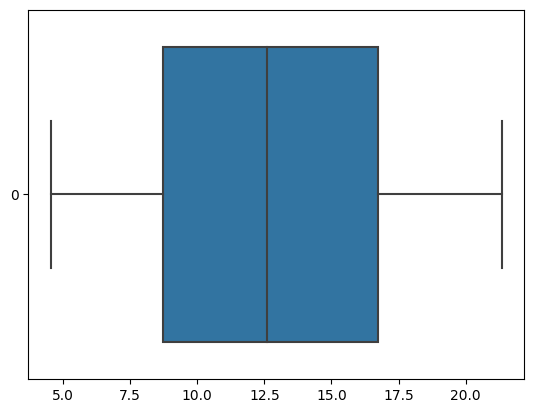

In [12]:
sns.boxplot(data=data["Item_Weight"],orient="h")

# No outliers in Item_Weight so we can fill null values with mean

# For better accuracy fill null values of Item_Weight with mean corresponding to Item_Identifire

In [13]:
data["Item_Identifier"].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [14]:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

In [15]:
item_avg_weight

Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1559 rows x 1 columns]

#### Define Function to compute weights

In [16]:
def compute_weights(cols):
    weight=cols[0]
    identifier=cols[1]
    
    if pd.isnull(weight):
        return item_avg_weight["Item_Weight"][item_avg_weight.index==identifier]
    else:
        return weight

In [17]:
data["Item_Weight"]=data[["Item_Weight","Item_Identifier"]].apply(compute_weights,axis=1).astype(float)

In [18]:
data["Item_Weight"].isnull().sum()

0

##### No null values in Item Weight

### Fill Null values of Outlet_Size with mode


In [19]:
outlet_size_mode=data.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium

In [20]:

def compute_size_mode(cols):
    size=cols[0]
    Type=cols[1]
    
    if pd.isnull(size):
        return outlet_size_mode.loc["Outlet_Size"][outlet_size_mode.columns==Type][0]
    else:
        return size

In [21]:

data["Outlet_Size"]=data[["Outlet_Size","Outlet_Type"]].apply(compute_size_mode,axis=1)

In [22]:
data["Outlet_Size"].isnull().sum()

0

#### No null values in Outlet_Size

# Feature Engineering

In [23]:
visibility_item_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')
visibility_item_avg

Item_Visibility
Item_Identifier                 
DRA12                   0.034938
DRA24                   0.045646
DRA59                   0.133384
DRB01                   0.079736
DRB13                   0.006799
...                          ...
NCZ30                   0.027302
NCZ41                   0.056396
NCZ42                   0.011015
NCZ53                   0.026330
NCZ54                   0.081345

[1559 rows x 1 columns]

In [24]:

def compute_visibility_mean(cols):
    visibility=cols[0]
    identifier=cols[1]
    
    if visibility==0:
        return visibility_item_avg["Item_Visibility"][visibility_item_avg.index==identifier]
    else:
        return visibility

In [25]:
data["Item_Visibility"]=data[["Item_Visibility","Item_Identifier"]].apply(
                            compute_visibility_mean,axis=1).astype(float)

In [26]:
sum(data.Item_Visibility==0)

0

In [27]:
data["Outlet_Years"]=2013-data["Outlet_Establishment_Year"]

In [28]:
data["Outlet_Years"].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

### Create a broad category of Item_Type

In [29]:
data["Item_Type_Combined"]=data["Item_Identifier"].apply(lambda x:x[0:2])

In [30]:
data["Item_Type_Combined"]=data["Item_Type_Combined"].map({"FD":"Food","NC":"Non-Consumable","DR":"Drinks"})

In [31]:
data["Item_Type_Combined"].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

### Change categories of Item_Fat_Content
Replacing values of LF and low fat with Low Fat and reg with Regular

In [32]:
data["Item_Fat_Content"]=data["Item_Fat_Content"].replace({"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"})

In [33]:
data["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

#### There are some non consumable that should not be included in Low Fat,fat content so replace them in Non-Edible 

In [34]:
data.loc[data["Item_Type_Combined"]=="Non-Consumable","Item_Fat_Content"]="Non-Edible"

In [35]:
data["Item_Fat_Content"].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

# Feature Transformations

#### The products that are more visible are likely to have higher sales so create new variable Item_Visibility_MeanRatio


In [36]:
item_visibility_func=lambda x: x["Item_Visibility"]/visibility_item_avg["Item_Visibility"][visibility_item_avg.index==x["Item_Identifier"]][0]
data["Item_Visibility_MeanRatio"]=data.apply(item_visibility_func,axis=1).astype(float)

In [37]:
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.017834   
4           NCD19         8.93       Non-Edible         0.009780   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998       Small               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales source  Outlet_Years  \
0  Supermarket Type1          3735.1380  train            14   
1  Supermarket Type2           443.4228  train             4   
2  Supermarket Type1          2097.2700  train            14   
3      Grocery Store           732.3800  train            15   
4  Supermarket Type1           994.7052  train            26   

  Item_Type_Combined  Item_Visibility_MeanRatio  
0               Food                   0.931078  
1             Drinks                   0.933420  
2               Food                   0.960069  
3               Food                   1.000000  
4     Non-Consumable                   1.000000

In [38]:
data["Item_Visibility_MeanRatio"].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

## Handling Categorical Variables

In [39]:
le=LabelEncoder()

In [40]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source', 'Outlet_Years',
       'Item_Type_Combined', 'Item_Visibility_MeanRatio'],
      dtype='object')

In [41]:
#Apply label Encoding to categorical variables

In [42]:
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.017834   
4           NCD19         8.93       Non-Edible         0.009780   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998       Small               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales source  Outlet_Years  \
0  Supermarket Type1          3735.1380  train            14   
1  Supermarket Type2           443.4228  train             4   
2  Supermarket Type1          2097.2700  train            14   
3      Grocery Store           732.3800  train            15   
4  Supermarket Type1           994.7052  train            26   

  Item_Type_Combined  Item_Visibility_MeanRatio  
0               Food                   0.931078  
1             Drinks                   0.933420  
2               Food                   0.960069  
3               Food                   1.000000  
4     Non-Consumable                   1.000000

In [43]:
cat_var=["Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Type_Combined"]
for i in cat_var:
    data[i]=le.fit_transform(data[i])

In [44]:
data.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30                 0         0.016047   
1           DRC01         5.92                 2         0.019278   
2           FDN15        17.50                 0         0.016760   
3           FDX07        19.20                 2         0.017834   
4           NCD19         8.93                 1         0.009780   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0                       1999            1                     0            1   
1                       2009            1                     2            2   
2                       1999            1                     0            1   
3                       1998            2                     2            0   
4                       1987            0                     2            1   

   Item_Outlet_Sales source  Outlet_Years  Item_Type_Combined  \
0          3735.1380  train            14                   1   
1           443.4228  train             4                   0   
2          2097.2700  train            14                   1   
3           732.3800  train            15                   1   
4           994.7052  train            26                   2   

   Item_Visibility_MeanRatio  
0                   0.931078  
1                   0.933420  
2                   0.960069  
3                   1.000000  
4                   1.000000

### Apply One Hot Encoding

In [45]:
data=pd.get_dummies(data,columns=["Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Type_Combined"])

In [46]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Visibility_MeanRatio    float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
d

#### Drop unnecessary columns

In [47]:
data.drop(["Item_Identifier","Item_Type","Outlet_Identifier","Outlet_Establishment_Year"],axis=1,inplace=True)

## Data Partitioning

In [48]:
train_df=data.loc[data["source"]=="train"]
test_df=data.loc[data["source"]=="test"]

In [49]:
train_df.drop(["source"],axis=1,inplace=True)
test_df.drop(["source","Item_Outlet_Sales"],axis=1,inplace=True)

In [50]:
train_df.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  Outlet_Years  \
0         9.30         0.016047  249.8092          3735.1380            14   
1         5.92         0.019278   48.2692           443.4228             4   
2        17.50         0.016760  141.6180          2097.2700            14   
3        19.20         0.017834  182.0950           732.3800            15   
4         8.93         0.009780   53.8614           994.7052            26   

   Item_Visibility_MeanRatio  Item_Fat_Content_0  Item_Fat_Content_1  \
0                   0.931078                   1                   0   
1                   0.933420                   0                   0   
2                   0.960069                   1                   0   
3                   1.000000                   0                   0   
4                   1.000000                   0                   1   

   Item_Fat_Content_2  Outlet_Size_0  ...  Outlet_Location_Type_0  \
0                   0              0  ...                       1   
1                   1              0  ...                       0   
2                   0              0  ...                       1   
3                   1              0  ...                       0   
4                   0              1  ...                       0   

   Outlet_Location_Type_1  Outlet_Location_Type_2  Outlet_Type_0  \
0                       0                       0              0   
1                       0                       1              0   
2                       0                       0              0   
3                       0                       1              1   
4                       0                       1              0   

   Outlet_Type_1  Outlet_Type_2  Outlet_Type_3  Item_Type_Combined_0  \
0              1              0              0                     0   
1              0              1              0                     1   
2              1              0              0                     0   
3              0              0              0                     0   
4              1              0              0                     0   

   Item_Type_Combined_1  Item_Type_Combined_2  
0                     1                     0  
1                     0                     0  
2                     1                     0  
3                     1                     0  
4                     0                     1  

[5 rows x 22 columns]

In [51]:
test_df.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Years  \
8523       20.750         0.007565  107.8622            14   
8524        8.300         0.038428   87.3198             6   
8525       14.600         0.099575  241.7538            15   
8526        7.315         0.015388  155.0340             6   
8527       13.600         0.118599  234.2300            28   

      Item_Visibility_MeanRatio  Item_Fat_Content_0  Item_Fat_Content_1  \
8523                   1.029192                   1                   0   
8524                   1.130311                   0                   0   
8525                   1.735215                   0                   1   
8526                   1.291577                   1                   0   
8527                   0.917824                   0                   0   

      Item_Fat_Content_2  Outlet_Size_0  Outlet_Size_1  ...  \
8523                   0              0              1  ...   
8524                   1              0              0  ...   
8525                   0              0              0  ...   
8526                   0              0              0  ...   
8527                   1              0              1  ...   

      Outlet_Location_Type_0  Outlet_Location_Type_1  Outlet_Location_Type_2  \
8523                       1                       0                       0   
8524                       0                       1                       0   
8525                       0                       0                       1   
8526                       0                       1                       0   
8527                       0                       0                       1   

      Outlet_Type_0  Outlet_Type_1  Outlet_Type_2  Outlet_Type_3  \
8523              0              1              0              0   
8524              0              1              0              0   
8525              1              0              0              0   
8526              0              1              0              0   
8527              0              0              0              1   

      Item_Type_Combined_0  Item_Type_Combined_1  Item_Type_Combined_2  
8523                     0                     1                     0  
8524                     0                     1                     0  
8525                     0                     0                     1  
8526                     0                     1                     0  
8527                     0                     1                     0  

[5 rows x 21 columns]

#### Save DataFrame in modified version

In [52]:
train_df.to_csv("train_modified.csv",index=False)
test_df.to_csv("test_modified.csv",index=False)

##  EDA exploratory data analysis

In [53]:
profile=ProfileReport(train_df,title="Stores Sales Analysis",explorative=True)

### Save EDA report to html file

In [54]:
profile.to_file("EDA Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [55]:
profile.to_notebook_iframe()

# Model Selection with EvalML

In [56]:
train_data_mod=pd.read_csv("train_modified.csv")

In [57]:
x_train_mod=train_data_mod.drop(["Item_Outlet_Sales"],axis=1)
y_train_mod=train_data_mod["Item_Outlet_Sales"]

In [58]:
x_train_mod.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Years  \
0         9.30         0.016047  249.8092            14   
1         5.92         0.019278   48.2692             4   
2        17.50         0.016760  141.6180            14   
3        19.20         0.017834  182.0950            15   
4         8.93         0.009780   53.8614            26   

   Item_Visibility_MeanRatio  Item_Fat_Content_0  Item_Fat_Content_1  \
0                   0.931078                   1                   0   
1                   0.933420                   0                   0   
2                   0.960069                   1                   0   
3                   1.000000                   0                   0   
4                   1.000000                   0                   1   

   Item_Fat_Content_2  Outlet_Size_0  Outlet_Size_1  ...  \
0                   0              0              1  ...   
1                   1              0              1  ...   
2                   0              0              1  ...   
3                   1              0              0  ...   
4                   0              1              0  ...   

   Outlet_Location_Type_0  Outlet_Location_Type_1  Outlet_Location_Type_2  \
0                       1                       0                       0   
1                       0                       0                       1   
2                       1                       0                       0   
3                       0                       0                       1   
4                       0                       0                       1   

   Outlet_Type_0  Outlet_Type_1  Outlet_Type_2  Outlet_Type_3  \
0              0              1              0              0   
1              0              0              1              0   
2              0              1              0              0   
3              1              0              0              0   
4              0              1              0              0   

   Item_Type_Combined_0  Item_Type_Combined_1  Item_Type_Combined_2  
0                     0                     1                     0  
1                     1                     0                     0  
2                     0                     1                     0  
3                     0                     1                     0  
4                     0                     0                     1  

[5 rows x 21 columns]

In [59]:
y_train_mod.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

### Search for best regression model for our data with EvalML

In [60]:
automl = AutoMLSearch(X_train=x_train_mod,y_train=y_train_mod,problem_type="regression",objective="root mean squared error",optimize_thresholds=True)
automl.search()

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 5682, number of used features: 11
[LightGBM] [Info] Start training from score 2168.594147
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000516 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 5682, number of used features: 11
[LightGBM] [Info] Start training from score 2177.744153
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1021
[LightGBM] [Info] Number of data points in 

{1: {'Random Forest Regressor w/ Imputer': 0.9329006671905518,
  'Total time of batch': 1.139449119567871},
 2: {'Random Forest Regressor w/ Imputer + RF Regressor Select From Model': 1.3123924732208252,
  'Total time of batch': 1.4454433917999268},
 3: {'Extra Trees Regressor w/ Imputer + Select Columns Transformer': 0.658501148223877,
  'XGBoost Regressor w/ Imputer + Select Columns Transformer': 1.0941236019134521,
  'LightGBM Regressor w/ Imputer + Select Columns Transformer': 0.44486308097839355,
  'Elastic Net Regressor w/ Imputer + Standard Scaler + Select Columns Transformer': 0.6736822128295898,
  'Total time of batch': 3.3752858638763428}}

In [61]:
automl.rankings

id                                      pipeline_name  search_order  \
0   3  Extra Trees Regressor w/ Imputer + Select Colu...             3   
1   2  Random Forest Regressor w/ Imputer + RF Regres...             2   
2   1                 Random Forest Regressor w/ Imputer             1   
3   5  LightGBM Regressor w/ Imputer + Select Columns...             5   
4   4  XGBoost Regressor w/ Imputer + Select Columns ...             4   
5   6  Elastic Net Regressor w/ Imputer + Standard Sc...             6   
6   0                  Mean Baseline Regression Pipeline             0   

   ranking_score  mean_cv_score  standard_deviation_cv_score  \
0    1083.721822    1083.721822                    16.972531   
1    1086.652820    1086.652820                    17.330410   
2    1086.919998    1086.919998                    17.453448   
3    1100.267385    1100.267385                    16.740840   
4    1115.294838    1115.294838                    15.098664   
5    1132.778080    1132.778080                    16.468030   
6    1706.523797    1706.523797                    21.384488   

   percent_better_than_baseline  high_variance_cv  \
0                     36.495358             False   
1                     36.323606             False   
2                     36.307950             False   
3                     35.525811             False   
4                     34.645222             False   
5                     33.620728             False   
6                      0.000000             False   

                                          parameters  
0  {'Imputer': {'categorical_impute_strategy': 'm...  
1  {'Imputer': {'categorical_impute_strategy': 'm...  
2  {'Imputer': {'categorical_impute_strategy': 'm...  
3  {'Imputer': {'categorical_impute_strategy': 'm...  
4  {'Imputer': {'categorical_impute_strategy': 'm...  
5  {'Imputer': {'categorical_impute_strategy': 'm...  
6       {'Baseline Regressor': {'strategy': 'mean'}}

### Getting best pipeline

In [62]:
automl.best_pipeline

pipeline = RegressionPipeline(component_graph={'Imputer': ['Imputer', 'X', 'y'], 'Select Columns Transformer': ['Select Columns Transformer', 'Imputer.x', 'y'], 'Extra Trees Regressor': ['Extra Trees Regressor', 'Select Columns Transformer.x', 'y']}, parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'boolean_impute_strategy': 'most_frequent', 'categorical_fill_value': None, 'numeric_fill_value': None, 'boolean_fill_value': None}, 'Select Columns Transformer':{'columns': ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Years', 'Item_Visibility_MeanRatio', 'Item_Fat_Content_0', 'Item_Fat_Content_2', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_3', 'Item_Type_Combined_1']}, 'Extra Trees Regressor':{'n_estimators': 100, 'max_features': 'auto', 'max_depth': 6, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_jobs': -1}}, random_seed=0)

In [63]:
best_pipeline=automl.best_pipeline

### Discription of Pipeline

In [64]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


*****************************************************************
* Extra Trees Regressor w/ Imputer + Select Columns Transformer *
*****************************************************************

Problem Type: regression
Model Family: Extra Trees

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * boolean_impute_strategy : most_frequent
	 * categorical_fill_value : None
	 * numeric_fill_value : None
	 * boolean_fill_value : None
2. Select Columns Transformer
	 * columns : ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Years', 'Item_Visibility_MeanRatio', 'Item_Fat_Content_0', 'Item_Fat_Content_2', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_3', 'Item_Type_Combined_1']
3. Extra Trees Regressor
	 * n_estimators : 100
	 * max_features : auto
	 * max_depth : 6
	 * min_samples_split : 2
	 * min_weight_fraction_leaf : 0.0
	 * n_jobs : -1

Training
Training for regression problems.
Total training time (including CV):

In [65]:
best_pipeline.score(x_train_mod,y_train_mod,objectives=["root mean squared error","mse","mae","r2"])

OrderedDict([('Root Mean Squared Error', 1066.7931057859944),
             ('MSE', 1138047.5305525276),
             ('MAE', 748.8885168721948),
             ('R2', 0.6091600314355806)])

In [66]:
#best_pipeline.graph()

In [67]:
# Create the Handler for logging records/messages to a file
file_handler = logging.FileHandler("log_file.log")

In [68]:
#set the format of the log records and the logging level to DEBUG
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG)

In [69]:
# a function  to create and save logs in the log files
def log(path, file):
    

    # check if the file exist
    log_file = os.path.join(path, file)

    if not os.path.isfile(log_file):
        open(log_file, "w+").close()

    console_logging_format = "%(levelname)s %(message)s"
    file_logging_format = "%(levelname)s: %(asctime)s: %(message)s"

    # configure logger
    logging.basicConfig(level=logging.INFO, format=console_logging_format)
    logger = logging.getLogger()
    
    # create a file handler for output file
    handler = logging.FileHandler(log_file)

    # set the logging level for log file
    handler.setLevel(logging.INFO)
    
    # create a logging format
    formatter = logging.Formatter(file_logging_format)
    handler.setFormatter(formatter)

    # add the handlers to the logger
    logger.addHandler(handler)

    return logger

In [70]:
logger = log(path=".",file="log_file.log")

In [71]:
logger.info("Start data training with random forest model")

2023-07-23 09:50:45,555 INFO:Start data training with random forest model


# train test split

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x_train_mod,y_train_mod,random_state=101,test_size=0.2)

## Create Random Forest model with sklearn.
We can't use EvalML to production because its of large size and free tier services provide only 500MB data limit.And with EvalML it goes to 620MB.

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)
logger.info("Train {}".format("RandomForestRegressor"))

2023-07-23 09:50:50,360 INFO:Train RandomForestRegressor


In [76]:
reg_rf.score(x_test, y_test)

0.5358898806584516

In [77]:
y_pred=reg_rf.predict(x_test)

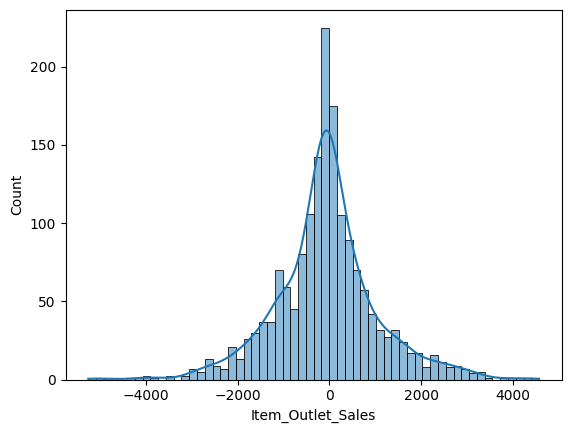

In [78]:
sns.histplot(y_test-y_pred,kde=True)
plt.show()

In [79]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [80]:
from sklearn import metrics

In [81]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
logger.info("MAE: {}\n\t\t\t\t\t\t\t   MSE:{}\n\t\t\t\t\t\t\t   RMSE:{}".format(metrics.mean_absolute_error(y_test, y_pred),metrics.mean_squared_error(y_test, y_pred),np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

2023-07-23 09:50:50,964 INFO:MAE: 791.6124850240469
							   MSE:1264869.3545893584
							   RMSE:1124.6641074513575


MAE: 791.6124850240469
MSE: 1264869.3545893584
RMSE: 1124.6641074513575


## Hyperparameter Tuning

    Choose following method for hyperparameter tuning
        RandomizedSearchCV --> Fast
        GridSearchCV
    Assign hyperparameters in form of dictionery
    Fit the model
    Check best paramters and best score

In [82]:
from sklearn.model_selection import RandomizedSearchCV

In [83]:
logger.info("-"*50)
logger.info("Start Hyper-Parameter Tuning")

2023-07-23 09:50:51,054 INFO:--------------------------------------------------
2023-07-23 09:50:51,056 INFO:Start Hyper-Parameter Tuning


In [84]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [85]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [86]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [87]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [88]:
logger.info(rf_random.fit(x_train,y_train))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

2023-07-23 10:03:22,874 INFO:RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)


In [89]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [90]:
logger.info("Best Paramteres:{}".format(rf_random.best_params_))

2023-07-23 10:03:22,962 INFO:Best Paramteres:{'n_estimators': 300, 'min_samples_split': 100, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 15}


In [91]:
prediction = rf_random.predict(x_test)

In [92]:
metrics.r2_score(y_test,prediction)

0.592708236271986

In [93]:
plt.figure(figsize = (8,8))
sns.histplot(y_test-prediction,kde=True)
plt.show()

In [94]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [95]:
print('R2:', metrics.r2_score(y_test,prediction))
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
logger.info("R2: {}\n\t\t\t\t\t\t\t   MAE: {}\n\t\t\t\t\t\t\t   MSE:{}\n\t\t\t\t\t\t\t   RMSE:{}".format(metrics.r2_score(y_test,prediction),metrics.mean_absolute_error(y_test, prediction),metrics.mean_squared_error(y_test, prediction),np.sqrt(metrics.mean_squared_error(y_test, prediction))))

2023-07-23 10:03:23,625 INFO:R2: 0.592708236271986
							   MAE: 743.1052390358826
							   MSE:1110018.611632748
							   RMSE:1053.5742079382676


R2: 0.592708236271986
MAE: 743.1052390358826
MSE: 1110018.611632748
RMSE: 1053.5742079382676


In [96]:
logger.info("-"*50)

2023-07-23 10:03:23,667 INFO:--------------------------------------------------


In [97]:
import pickle
# open a file, where you want to store the data
file = open('rf_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)
file.close()

## Predicting test data

In [98]:
with open("rf_model.pkl","rb") as file1:
    model=pickle.load(file1)

In [99]:
test_df.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Years  \
8523       20.750         0.007565  107.8622            14   
8524        8.300         0.038428   87.3198             6   
8525       14.600         0.099575  241.7538            15   
8526        7.315         0.015388  155.0340             6   
8527       13.600         0.118599  234.2300            28   

      Item_Visibility_MeanRatio  Item_Fat_Content_0  Item_Fat_Content_1  \
8523                   1.029192                   1                   0   
8524                   1.130311                   0                   0   
8525                   1.735215                   0                   1   
8526                   1.291577                   1                   0   
8527                   0.917824                   0                   0   

      Item_Fat_Content_2  Outlet_Size_0  Outlet_Size_1  ...  \
8523                   0              0              1  ...   
8524                   1              0              0  ...   
8525                   0              0              0  ...   
8526                   0              0              0  ...   
8527                   1              0              1  ...   

      Outlet_Location_Type_0  Outlet_Location_Type_1  Outlet_Location_Type_2  \
8523                       1                       0                       0   
8524                       0                       1                       0   
8525                       0                       0                       1   
8526                       0                       1                       0   
8527                       0                       0                       1   

      Outlet_Type_0  Outlet_Type_1  Outlet_Type_2  Outlet_Type_3  \
8523              0              1              0              0   
8524              0              1              0              0   
8525              1              0              0              0   
8526              0              1              0              0   
8527              0              0              0              1   

      Item_Type_Combined_0  Item_Type_Combined_1  Item_Type_Combined_2  
8523                     0                     1                     0  
8524                     0                     1                     0  
8525                     0                     0                     1  
8526                     0                     1                     0  
8527                     0                     1                     0  

[5 rows x 21 columns]

In [100]:
test_df['Item_Outlet_Sales'] = (model.predict(test_df)).tolist()

In [101]:
test_df.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Years  \
8523       20.750         0.007565  107.8622            14   
8524        8.300         0.038428   87.3198             6   
8525       14.600         0.099575  241.7538            15   
8526        7.315         0.015388  155.0340             6   
8527       13.600         0.118599  234.2300            28   

      Item_Visibility_MeanRatio  Item_Fat_Content_0  Item_Fat_Content_1  \
8523                   1.029192                   1                   0   
8524                   1.130311                   0                   0   
8525                   1.735215                   0                   1   
8526                   1.291577                   1                   0   
8527                   0.917824                   0                   0   

      Item_Fat_Content_2  Outlet_Size_0  Outlet_Size_1  ...  \
8523                   0              0              1  ...   
8524                   1              0              0  ...   
8525                   0              0              0  ...   
8526                   0              0              0  ...   
8527                   1              0              1  ...   

      Outlet_Location_Type_1  Outlet_Location_Type_2  Outlet_Type_0  \
8523                       0                       0              0   
8524                       1                       0              0   
8525                       0                       1              1   
8526                       1                       0              0   
8527                       0                       1              0   

      Outlet_Type_1  Outlet_Type_2  Outlet_Type_3  Item_Type_Combined_0  \
8523              1              0              0                     0   
8524              1              0              0                     0   
8525              0              0              0                     0   
8526              1              0              0                     0   
8527              0              0              1                     0   

      Item_Type_Combined_1  Item_Type_Combined_2  Item_Outlet_Sales  
8523                     1                     0        1605.530765  
8524                     1                     0        1275.869818  
8525                     0                     1         602.291918  
8526                     1                     0        2433.751586  
8527                     1                     0        6068.382873  

[5 rows x 22 columns]

In [102]:
#Save Output dataframe in csv file
test_df.to_csv("Test_Output.csv",index=False)

In [103]:
submission=pd.concat([test_data["Item_Identifier"],test_data["Outlet_Identifier"],pd.DataFrame(test_df["Item_Outlet_Sales"].tolist(),columns=["Item_Outlet_Sales"])],axis=True)

In [104]:
submission.head()

Item_Identifier Outlet_Identifier  Item_Outlet_Sales
0           FDW58            OUT049        1605.530765
1           FDW14            OUT017        1275.869818
2           NCN55            OUT010         602.291918
3           FDQ58            OUT017        2433.751586
4           FDY38            OUT027        6068.382873

In [105]:
submission.to_csv("Submission.csv",index=False)